<a href="https://colab.research.google.com/github/gmarambaia/gmarambaia/blob/main/Capstone_Coursera_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering, Simulation and Optimization models

While the predictive models can be quite informative, they are often not sufficient. For a portfolio of loans, how do investors understand its risk profile and return potential?<p>
Furthermore, since investors usually have limited investment budget, it is important that they cherry pick the investments and only invest in the most lucrative loans and allocate the investment wisely. <p>
Simulation and optimization models can be used to help make those decisions. Before engaging in simulation and optimization modeling, it is important to calibrate input parameters. Cluster analysis can be used to categorize the loans into groups, each with its own set of parameters to model uncertainty. One benefit of cluster analysis is that it reduces the number of input parameters for the subsequent model building.

## K-Means Clustering
The k-means clustering method is an unsupervised machine learning technique used to identify clusters of data objects in a dataset. There are many different types of clustering methods, but k-means is one of the oldest and most approachable. 

In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
df=pd.read_csv("data-capstone-project-kmeans.csv")
df.head()

,loan_amnt,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc
0,8000,6.68,245.85,41000.0,24377,51.0,29
1,12175,9.17,388.13,100000.0,21329,64.6,17
2,6400,6.92,197.38,41900.0,14936,73.2,15
3,12600,6.68,387.22,73800.0,9904,20.7,25
4,8000,7.89,250.29,47840.0,8019,46.9,11


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6201 entries, 0 to 6200
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0     loan_amnt    6201 non-null   int64  
 1   int_rate       6201 non-null   float64
 2    installment   6201 non-null   float64
 3    annual_inc    6201 non-null   float64
 4    revol_bal     6201 non-null   int64  
 5   revol_util     6201 non-null   float64
 6   total_acc      6201 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 339.2 KB


In [30]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc
count,6201.000000,6201.000000,6201.000000,6201.000000,6201.000000,6201.000000,6201.000000
mean,11962.183519,10.419587,387.844417,65457.937945,13331.840348,52.421867,25.021448
std,6558.530468,3.216196,213.119988,30107.935597,8482.821506,22.650857,12.205248
min,1000.000000,5.320000,30.850000,8435.000000,0.000000,0.000000,4.000000
25%,7000.000000,7.890000,229.140000,43000.000000,6804.000000,35.400000,16.000000
50%,10000.000000,9.990000,333.530000,60000.000000,11402.000000,51.900000,23.000000
75%,15600.000000,12.690000,502.790000,83000.000000,18065.000000,69.100000,32.000000
max,35000.000000,19.520000,1154.660000,165000.000000,39104.000000,113.100000,82.000000


We can see that there is a lot of variation in the magnitude of the data. <p>

Since K-Means is a distance-based algorithm, this difference of magnitude can create a problem. So let’s first bring all the variables to the same magnitude<p>
We gonna do it using *MinMax* function.

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

#renaming the columns
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns=['loan_amnt','int_rate','installment', 'annual_inc','revol_bal','revol_util', 'total_acc']
 
df_scaled.head()

,loan_amnt,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc
0,0.205882,0.095775,0.191313,0.207997,0.623389,0.450928,0.320513
1,0.328676,0.271127,0.317919,0.584837,0.545443,0.571176,0.166667
2,0.158824,0.112676,0.148183,0.213745,0.381956,0.647215,0.141026
3,0.341176,0.095775,0.317109,0.417494,0.253273,0.183024,0.269231
4,0.205882,0.180986,0.195264,0.251685,0.205069,0.414677,0.089744


In [32]:
df_scaled.describe()

,loan_amnt,int_rate,installment,annual_inc,revol_bal,revol_util,total_acc
count,6201.000000,6201.000000,6201.000000,6201.000000,6201.000000,6201.000000,6201.000000
mean,0.322417,0.359126,0.317664,0.364213,0.340933,0.463500,0.269506
std,0.192898,0.226493,0.189641,0.192303,0.216930,0.200273,0.156478
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.176471,0.180986,0.176444,0.220771,0.173998,0.312997,0.153846
50%,0.264706,0.328873,0.269334,0.329352,0.291581,0.458886,0.243590
75%,0.429412,0.519014,0.419946,0.476256,0.461973,0.610964,0.358974
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Next, let’s create a kmeans function and fit it on the data with 2 clusters to see what we got.

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(df_scaled)

KMeans(n_clusters=2)

Let’s evaluate how well the formed clusters are. To do that, we will calculate the inertia of the clusters

In [34]:
# inertia on the fitted data
print('The inertia of the model is:', round((kmeans.inertia_),2))

The inertia of the model is: 1222.97


We got an inertia value of almost 1223.<p>
I randomly chose 2 clusters. We don't know how many clusters we might need. To determine it we can use the elbow curve to determine the optimum number of clusters.

In [35]:
kmeans.cluster_centers_

array([[0.5246659 , 0.3335842 , 0.51472818, 0.50319389, 0.54043441,
        0.52777868, 0.31103915],
       [0.2169004 , 0.3724514 , 0.2148527 , 0.29170351, 0.23684942,
        0.4299649 , 0.24783703]])

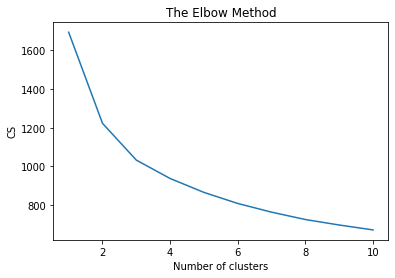

In [36]:
 #using elbow method to find optimal number of clusters 
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_scaled)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

Theoretically when we have a major drop on the curve, we got the number of optimal clusters. We can see that it is probably 3. But if you want to double-check it, we have some trick to know exactly the number.

In [23]:
!pip install --upgrade kneed
from kneed import KneeLocator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
#
kl = KneeLocator(
    range(1, 11), cs, curve="convex", direction="decreasing"
)

print('The optimal number of clusters is:', kl.elbow, 'clusters')

The optimal number of clusters is: 3 clusters


Ok, let's go with 3 clusters.

In [38]:
kmeans = KMeans(n_clusters=3, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(df_scaled)

# inertia on the fitted data
print('The inertia of the model is:', round((kmeans.inertia_),2))

The inertia of the model is: 1032.94


It's better than the previous model.